In [1]:
%pip install torchvision

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
# python imports
import os
from tqdm import tqdm

# torch imports
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# helper functions for computer vision
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets

import argparse

import scipy.io

import matplotlib.pyplot as plt
import numpy as np

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [3]:
# Import MNIST

from torchvision.datasets import EMNIST
#torchvision.datasets.EMNIST()
# Download and Save MNIST 
digits_train = EMNIST( './emnist_data', train=True, split="mnist", download=True, transform = transforms.Compose([transforms.ToTensor(),
                                                                                                                  transforms.RandomCrop(size = 32, padding = 2, fill=0), 
                                                                                                                  lambda img: torchvision.transforms.functional.rotate(img, -90),
                                                                                                                  lambda img: torchvision.transforms.functional.hflip(img)]))
digits_train_large = EMNIST( './emnist_data', train=True, split="digits", download=True, transform = transforms.Compose([transforms.ToTensor(),
                                                                                                                         transforms.RandomCrop(size = 32, padding = 2, fill=0),
                                                                                                                         lambda img: torchvision.transforms.functional.rotate(img, -90),
                                                                                                                         lambda img: torchvision.transforms.functional.hflip(img)]))
letters_train = EMNIST( './emnist_data', train=True, split="letters", download=True, transform = transforms.Compose([transforms.ToTensor(),
                                                                                                                     transforms.RandomCrop(size = 32, padding = 2, fill=0),
                                                                                                                     lambda img: torchvision.transforms.functional.rotate(img, -90),
                                                                                                                     lambda img: torchvision.transforms.functional.hflip(img)]))
letters_train.targets += 9

digits_test = EMNIST( './emnist_data', train=False, split="mnist", download=True, transform = transforms.Compose([transforms.ToTensor(),
                                                                                                                  transforms.RandomCrop(size = 32, padding = 2, fill=0), 
                                                                                                                  lambda img: torchvision.transforms.functional.rotate(img, -90),
                                                                                                                  lambda img: torchvision.transforms.functional.hflip(img)]))
digits_test_large = EMNIST( './emnist_data', train=False, split="digits", download=True, transform = transforms.Compose([transforms.ToTensor(),
                                                                                                                         transforms.RandomCrop(size = 32, padding = 2, fill=0),
                                                                                                                         lambda img: torchvision.transforms.functional.rotate(img, -90),
                                                                                                                         lambda img: torchvision.transforms.functional.hflip(img)]))
letters_test = EMNIST( './emnist_data', train=False, split="letters", download=True, transform = transforms.Compose([transforms.ToTensor(),
                                                                                                                     transforms.RandomCrop(size = 32, padding = 2, fill=0),
                                                                                                                     lambda img: torchvision.transforms.functional.rotate(img, -90),
                                                                                                                     lambda img: torchvision.transforms.functional.hflip(img)]))
letters_test.targets += 9

#comb_train = torch.utils.data.ConcatDataset([digits_train,letters_train])
comb_train = digits_train_large
#comb_test = torch.utils.data.ConcatDataset([digits_test,letters_test])
comb_test = digits_test_large
#data_train = torch.utils.data.DataLoader(comb_train , batch_size=128,shuffle=True )

#data_test = torch.utils.data.DataLoader( comb_test , batch_size=128,shuffle=True )
#for batch_idx, samples in enumerate(data_train):
    #print(batch_idx, samples)

In [4]:
comb_train[5][0][0].shape

torch.Size([32, 32])

In [5]:
# for i in range(len(comb_train)):
#     temp = list(comb_train[i])
#     temp_matrix = temp[0][0].clone().T
#     temp[0][0] = temp_matrix
#     comb_train[i] = tuple(temp)

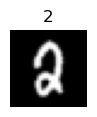

In [7]:
figure = plt.figure(figsize=(1, 1))
cols, rows = 1, 1
sample_idx = 5
img, label = comb_test[sample_idx]
figure.add_subplot(rows, cols, 1)
plt.title(label) 
plt.axis("off")
plt.imshow(img.view(32,32), cmap="gray")
#plt.show()

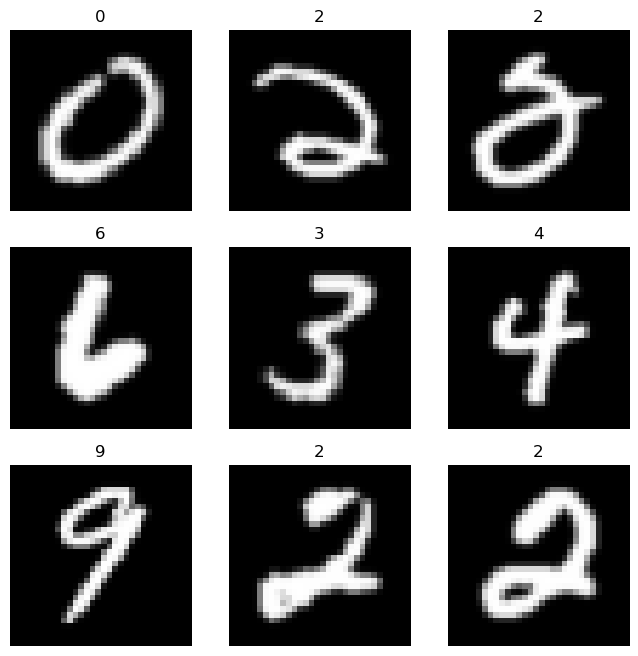

In [8]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(comb_test), size=(1,)).item()
    img, label = comb_test[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label) 
    plt.axis("off")
    plt.imshow(img.view(32,32), cmap="gray")
#plt.show()

In [60]:
class LeNet(nn.Module):
    def __init__(self, input_shape=(32, 32), num_classes=10):
        super(LeNet, self).__init__()
        # certain definitions
        self.num_classes = num_classes
        self.input_shape = input_shape
        self.conv1 = nn.Conv2d(1,6,5, bias=False)
        self.conv2 = nn.Conv2d(6,16,5, bias=False)
        self.lin1 = nn.Linear(400,120, bias=False)
        # self.lin1 = nn.Linear(784,64)
        self.lin2 = nn.Linear(120,84, bias=False)
        self.lin3 = nn.Linear(84,num_classes, bias=False)
        
    def forward(self, x):
        shape_dict = {}
        '''        
        # neuron network
        #Layer3
        x = torch.flatten(x,1)
        shape_dict[1] = list(x.size())
        #Layer4
        x = F.relu(self.lin1(x))
        shape_dict[2] = list(x.size())
        #Layer5
        # x = F.relu(self.lin2(x))
        # shape_dict[3] = list(x.size())
        #Layer6
        out = self.lin2(x)
        shape_dict[3] = list(out.size())
        # out = self.lin3(x)
        # shape_dict[4] = list(out.size())
        '''
        # CNN
        #Layer1
        x = F.avg_pool2d(F.relu(self.conv1(x)),kernel_size=2,stride=2)
        shape_dict[1] = list(x.size())
        #Layer2
        x = F.avg_pool2d(F.relu(self.conv2(x)),kernel_size=2,stride=2)
        shape_dict[2] = list(x.size())
        #Layer3
        x = torch.flatten(x,1)
        shape_dict[3] = list(x.size())
        #Layer4
        x = F.relu(self.lin1(x))
        shape_dict[4] = list(x.size())
        #Layer5
        x = F.relu(self.lin2(x))
        shape_dict[5] = list(x.size())
        #Layer6
        out = self.lin3(x)
        shape_dict[6] = list(out.size())


        return out, shape_dict


def count_model_params():
    '''
    return the number of trainable parameters of LeNet.
    '''
    model = LeNet()
    model_params = 0.0
    for name, param in model.named_parameters():
        temp_result = 1
        for each in param.size():
            temp_result = temp_result*each
        model_params += temp_result
    return model_params/1000000


def train_model(model, train_loader, optimizer, criterion, epoch):
    """
    model (torch.nn.module): The model created to train
    train_loader (pytorch data loader): Training data loader
    optimizer (optimizer.*): A instance of some sort of optimizer, usually SGD
    criterion (nn.CrossEntropyLoss) : Loss function used to train the network
    epoch (int): Current epoch number
    """
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    model.train()
    train_loss = 0.0
    
    for input, target in tqdm(train_loader, total=len(train_loader)):
        ###################################
        # fill in the standard training loop of forward pass,
        # backward pass, loss computation and optimizer step
        ###################################
        #might want to fix later TODO
        input = input.to(device)
        target = target.to(device)
        
        # 1) zero the parameter gradients
        optimizer.zero_grad()
        # 2) forward + backward + optimize
        output, _ = model(input)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        # Update the train_loss variable
        # .item() detaches the node from the computational graph
        # Uncomment the below line after you fill block 1 and 2
        train_loss += loss.item()

    train_loss /= len(train_loader)
    print('[Training set] Epoch: {:d}, Average loss: {:.4f}'.format(epoch+1, train_loss))

    return train_loss


def test_model(model, test_loader, epoch):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    model.eval()
    correct = 0
    with torch.no_grad():
        for input, target in test_loader:
            input = input.to(device)
            target = target.to(device)
            output, _ = model(input)
            pred = output.max(1, keepdim=True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_acc = correct / len(test_loader.dataset)
    print('[Test set] Epoch: {:d}, Accuracy: {:.2f}%\n'.format(
        epoch+1, 100. * test_acc))

    return test_acc


In [61]:
def save_checkpoint(state, is_best,
                    file_folder="./outputs/",
                    filename='checkpoint.pth.tar'):
    """save checkpoint"""
    if not os.path.exists(file_folder):
        os.makedirs(os.path.expanduser(file_folder), exist_ok=True)
    torch.save(state, os.path.join(file_folder, filename))
    if is_best:
        # skip the optimization state
        state.pop('optimizer', None)
        torch.save(state, os.path.join(file_folder, 'model_best.pth.tar'))







In [62]:
class MyArgs:
    resume = False #"./outputs/checkpoint.pth.tar"
    epochs = 1
    lr = 0.002
    batch_size = 128
args = MyArgs()

# main function for training and testing

# set up random seed
#torch.manual_seed(0)

###################################
# setup model, loss and optimizer #
###################################

model = LeNet()

training_criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=0.9)
# optim.Adam(model.parameters(), lr=args.lr)

# set up transforms to transform the PIL Image to tensors
train_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

################################
# setup dataset and dataloader #
################################

train_loader = torch.utils.data.DataLoader(comb_train , batch_size=args.batch_size,shuffle=True )
test_loader = torch.utils.data.DataLoader( comb_test , batch_size=args.batch_size,shuffle=True )

################################
# start the training           #
################################
# resume from a previous checkpoint
best_acc = 0.0
start_epoch = 0
if args.resume:
    if os.path.isfile(args.resume):
        print("=> loading checkpoint '{:s}'".format(args.resume))
        checkpoint = torch.load(args.resume)
        start_epoch = checkpoint['epoch']
        best_acc = checkpoint['best_acc']
        # load model weight
        model.load_state_dict(checkpoint['state_dict'])
        # load optimizer states
        optimizer.load_state_dict(checkpoint['optimizer'])
        print("=> loaded checkpoint '{:s}' (epoch {:d}, acc {:0.2f})".format(
            args.resume, checkpoint['epoch'], 100*best_acc))
    else:
        print("=> no checkpoint found at '{}'".format(args.resume))

# training of the model
print("Training the model ...\n")
for epoch in range(start_epoch, args.epochs):
    # train model for 1 epoch
    train_model(model, train_loader, optimizer, training_criterion, epoch)
    # evaluate the model on test_set after this epoch
    acc = test_model(model, test_loader, epoch)
    # save the current checkpoint
    save_checkpoint({
        'epoch': epoch + 1,
        'state_dict': model.state_dict(),
        'best_acc' : max(best_acc, acc),
        'optimizer' : optimizer.state_dict(),
        }, (acc > best_acc))
    best_acc = max(best_acc, acc)
print("Finished Training")

Training the model ...



100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [01:58<00:00, 15.83it/s]


[Training set] Epoch: 1, Average loss: 0.7770
[Test set] Epoch: 1, Accuracy: 94.70%

Finished Training


In [63]:
model

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), bias=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1), bias=False)
  (lin1): Linear(in_features=400, out_features=120, bias=False)
  (lin2): Linear(in_features=120, out_features=84, bias=False)
  (lin3): Linear(in_features=84, out_features=10, bias=False)
)

In [64]:
count_model_params() *1000000

61470.0

In [65]:
model.conv1.weight.shape

torch.Size([6, 1, 5, 5])

In [77]:
6*1*5*5 + 16*6*5*5 + 400*120 + 120*84 #+ 84*10

60630

In [67]:
model.conv2.weight.shape

torch.Size([16, 6, 5, 5])

In [68]:
model.lin1.weight.shape

torch.Size([120, 400])

In [69]:
model.lin2.weight.shape

torch.Size([84, 120])

In [79]:
import struct
write_file = open('weightfix.hex', 'w')
for i in range(len(model.conv1.weight.reshape(-1))):
    s_print = "@"+hex(i)[2:].zfill(4)+" "+hex(struct.unpack('<I', struct.pack('<f', model.conv1.weight.reshape(-1)[i].item()))[0])[2:].zfill(8)
    write_file.write(s_print.strip()+'\n')
for i in range(len(model.conv2.weight.reshape(-1))):
    s_print = "@"+hex(i+len(model.conv1.weight.reshape(-1)))[2:].zfill(4)+" "+hex(struct.unpack('<I', struct.pack('<f', model.conv2.weight.reshape(-1)[i].item()))[0])[2:].zfill(8)
    write_file.write(s_print.strip()+'\n')
for i in range(len(model.lin1.weight.reshape(-1))):
    s_print = "@"+hex(i+len(model.conv1.weight.reshape(-1))+len(model.conv2.weight.reshape(-1)))[2:].zfill(4)+" "+hex(struct.unpack('<I', struct.pack('<f', model.lin1.weight.reshape(-1)[i].item()))[0])[2:].zfill(8)
    write_file.write(s_print.strip()+'\n')
for i in range(len(model.lin2.weight.reshape(-1))):
    s_print = "@"+hex(i+len(model.conv1.weight.reshape(-1))+len(model.conv2.weight.reshape(-1))+len(model.lin1.weight.reshape(-1)))[2:].zfill(4)+" "+hex(struct.unpack('<I', struct.pack('<f', model.lin2.weight.reshape(-1)[i].item()))[0])[2:].zfill(8)
    write_file.write(s_print.strip()+'\n')
for i in range(len(model.lin3.weight.reshape(-1))):
    s_print = "@"+hex(i+len(model.conv1.weight.reshape(-1))+len(model.conv2.weight.reshape(-1))+len(model.lin1.weight.reshape(-1))+len(model.lin2.weight.reshape(-1)))[2:].zfill(4)+" "+hex(struct.unpack('<I', struct.pack('<f', model.lin3.weight.reshape(-1)[i].item()))[0])[2:].zfill(8)
    write_file.write(s_print.strip()+'\n')
write_file.close()

In [25]:
model.lin1.weight

Parameter containing:
tensor([[-0.0187,  0.0300,  0.0211,  ..., -0.0336, -0.0211,  0.0193],
        [ 0.0190, -0.0062, -0.0183,  ...,  0.0253, -0.0191,  0.0412],
        [-0.0082, -0.0511,  0.0135,  ...,  0.0213, -0.0060, -0.0154],
        ...,
        [-0.0600, -0.0005, -0.0525,  ...,  0.0412, -0.0041, -0.0394],
        [ 0.0013, -0.0401,  0.0415,  ...,  0.0039, -0.0106, -0.0222],
        [-0.0156,  0.0858,  0.1285,  ...,  0.0133,  0.0270, -0.0471]],
       requires_grad=True)

In [ ]:
len(model.lin1.weight.reshape(-1))

In [72]:
import struct
write_file = open('weightfix.hex', 'w')
for i in range(len(model.lin1.weight.reshape(-1))):
    s_print = "@"+hex(i)[2:].zfill(4)+" "+hex(struct.unpack('<I', struct.pack('<f', model.lin1.weight.reshape(-1)[i].item()))[0])[2:].zfill(8)
    write_file.write(s_print.strip()+'\n')
for i in range(len(model.lin2.weight.reshape(-1))):
    s_print = "@"+hex(i+len(model.lin1.weight.reshape(-1)))[2:].zfill(4)+" "+hex(struct.unpack('<I', struct.pack('<f', model.lin2.weight.reshape(-1)[i].item()))[0])[2:].zfill(8)
    write_file.write(s_print.strip()+'\n')
write_file.close()

In [71]:
write_file = open('weightfix.hex', 'w')
for i in range(len(model.lin2.weight.reshape(-1))):
    s_print = "@"+hex(i+len(model.lin1.weight.reshape(-1)))[2:].zfill(4)+" "+hex(struct.unpack('<I', struct.pack('<f', model.lin2.weight.reshape(-1)[i].item()))[0])[2:].zfill(8)
    write_file.write(s_print.strip()+'\n')
write_file.close()

In [ ]:
for i in range(len(model.lin2.weight.reshape(-1))):
    print("@"+hex(i+len(model.lin1.weight.reshape(-1)))[2:].zfill(4)+" "+hex(struct.unpack('<I', struct.pack('<f', model.lin2.weight.reshape(-1)[i].item()))[0])[2:].zfill(8), end="|")
print()

In [ ]:
count_model_params() * 1000000

In [ ]:
with open('fixed_image.hex','r') as file:
    img = file.read().split("\n")
hex_num = []
for i in range(len(img)):
    if img[i][6:] != '':
        hex_num.append(img[i][6:])
len(hex_num)

In [ ]:
int_num = []
for i in range(len(hex_num)):
    int_num.append(int(hex_num[i], 16))
len(int_num)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
model.eval()
correct = 0
with torch.no_grad():
    input = torch.FloatTensor(int_num).reshape(1, 784)
    input = input.to(device)
    output, _ = model(input)
output

In [ ]:
max(output.reshape(10).tolist())

In [ ]:
output.reshape(10).tolist().index(max(output.reshape(10).tolist()))

In [ ]:
figure = plt.figure(figsize=(1, 1))
cols, rows = 1, 1
sample_idx = 5
figure.add_subplot(rows, cols, 1)
plt.title(label) 
plt.axis("off")
plt.imshow(torch.FloatTensor(int_num).view(28,28), cmap="gray")

In [38]:
comb_test[sample_idx][0].reshape(-1)

tensor([0., 0., 0.,  ..., 0., 0., 0.])

In [41]:
import struct
for i in range(len(comb_test[sample_idx][0].reshape(-1))):
    print("@"+hex(i)[2:].zfill(4)+" "+hex(struct.unpack('<I', struct.pack('<f', comb_test[sample_idx][0].reshape(-1)[i].item()))[0])
          [2:].zfill(8), end="|")
print()

@0000 00000000|@0001 00000000|@0002 00000000|@0003 00000000|@0004 00000000|@0005 00000000|@0006 00000000|@0007 00000000|@0008 00000000|@0009 00000000|@000a 00000000|@000b 00000000|@000c 00000000|@000d 00000000|@000e 00000000|@000f 00000000|@0010 00000000|@0011 00000000|@0012 00000000|@0013 00000000|@0014 00000000|@0015 00000000|@0016 00000000|@0017 00000000|@0018 00000000|@0019 00000000|@001a 00000000|@001b 00000000|@001c 00000000|@001d 00000000|@001e 00000000|@001f 00000000|@0020 00000000|@0021 00000000|@0022 00000000|@0023 00000000|@0024 00000000|@0025 00000000|@0026 00000000|@0027 00000000|@0028 00000000|@0029 00000000|@002a 00000000|@002b 00000000|@002c 00000000|@002d 00000000|@002e 00000000|@002f 00000000|@0030 00000000|@0031 00000000|@0032 00000000|@0033 00000000|@0034 00000000|@0035 00000000|@0036 00000000|@0037 00000000|@0038 00000000|@0039 00000000|@003a 00000000|@003b 00000000|@003c 00000000|@003d 00000000|@003e 00000000|@003f 00000000|@0040 00000000|@0041 00000000|@0042 0000

@03e0 00000000|@03e1 00000000|@03e2 00000000|@03e3 00000000|@03e4 00000000|@03e5 00000000|@03e6 00000000|@03e7 00000000|@03e8 00000000|@03e9 00000000|@03ea 00000000|@03eb 00000000|@03ec 00000000|@03ed 00000000|@03ee 00000000|@03ef 00000000|@03f0 00000000|@03f1 00000000|@03f2 00000000|@03f3 00000000|@03f4 00000000|@03f5 00000000|@03f6 00000000|@03f7 00000000|@03f8 00000000|@03f9 00000000|@03fa 00000000|@03fb 00000000|@03fc 00000000|@03fd 00000000|@03fe 00000000|@03ff 00000000|
